In [11]:
# Q1 Simple linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("csv_files/fish.csv")

In [7]:
df.corr(numeric_only=True)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [20]:
x = df[["Length3"]]
y = df[["Weight"]]
mse = []
r2 = []
for i in range(1,43):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test,y_pred))
    

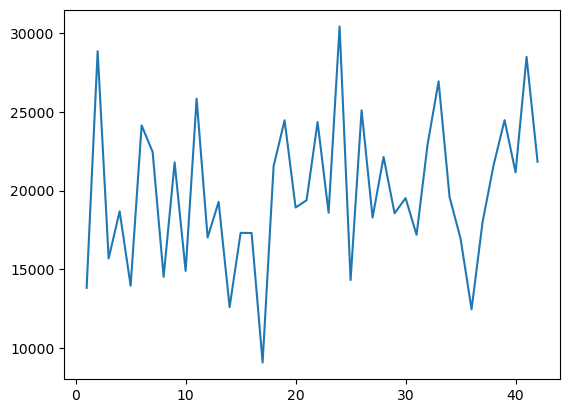

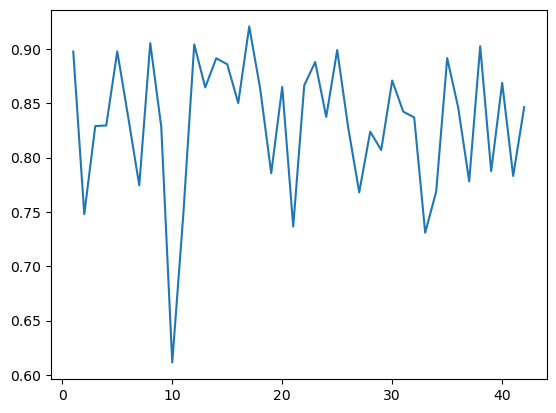

In [21]:
plt.plot(range(1,43),mse)
plt.show()
plt.plot(range(1,43),r2)
plt.show()

In [32]:
max(r2),min(mse)

(0.9207298326952611, 9085.16422249463)

In [35]:
x = df.drop(columns=["Weight","Species"])
y = df[["Weight"]]
mse = []
r2 = []
for i in range(1,43):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test,y_pred))
    

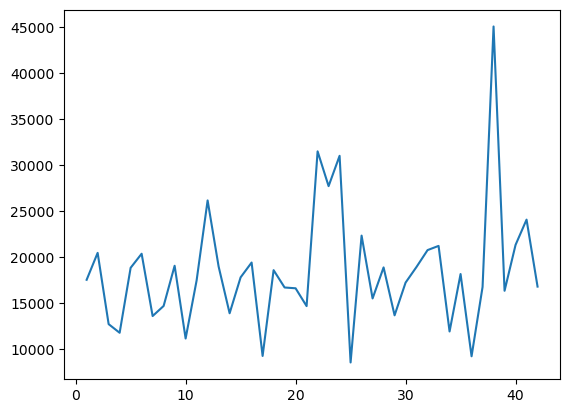

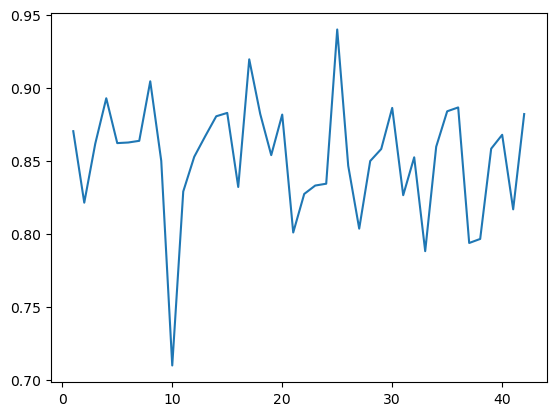

In [36]:
plt.plot(range(1,43),mse)
plt.show()
plt.plot(range(1,43),r2)
plt.show()

In [37]:
max(r2),min(mse)

(0.9400086678556974, 8507.32704583203)

In [40]:
r2[24],mse[24]

(0.9400086678556974, 8507.32704583203)

In [52]:
# y_pred = model.predict([["Length1",20],["Length3",40],["height",25],["width",3.5]])
y_pred = model.predict([[20,30,40,20,4.5]])
y_pred

D:\Softwares\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[166.1629561]])

In [67]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(columns=["Weight","Species"])
y = df[["Weight"]]
mse = []
r2 = []
for i in range(1,11):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    model = LinearRegression()
    model.fit(x_poly,y_train)
    y_pred = model.predict(x_test_poly)
    mse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test,y_pred))
    

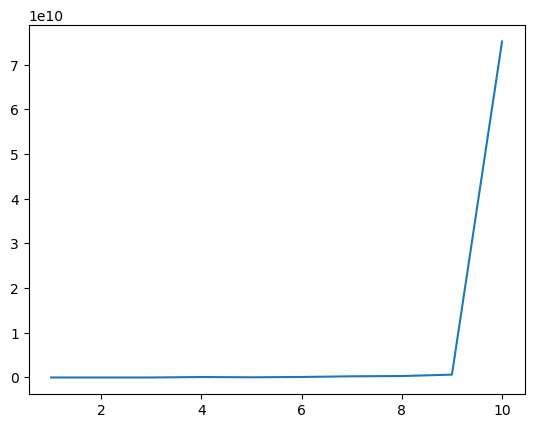

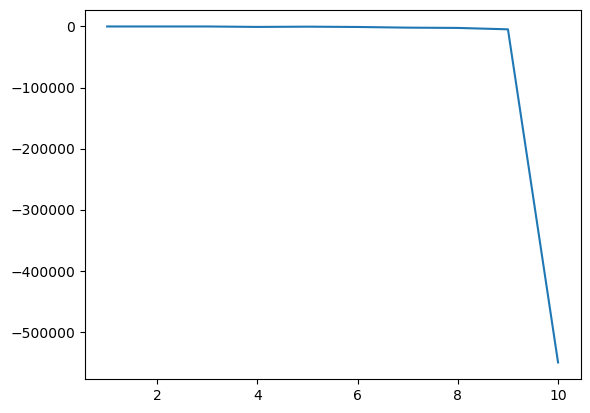

In [69]:
plt.plot(range(1,11),mse)
plt.show()
plt.plot(range(1,11),r2)
plt.show()

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
model = LinearRegression()
model.fit(x_poly,y_train)
y_pred = model.predict(x_test_poly)
mse.append(mean_squared_error(y_test, y_pred))
r2.append(r2_score(y_test,y_pred))
a = poly.transform([[20,30,30,20,4.5]])
y_pred = model.predict(a)
y_pred

D:\Softwares\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[-364.3526435]])

In [59]:
x

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672
